# Taller Computacional 28/09/2023
---
```python
Estos son los paquetes que usaremos en la sesión actual: 
sympy #Álgebra simbólica computacional.
IPython #Escribir funciones en jupyter.
numpy #Procesamiento de datos numéricos.
gekko #Resolver problemas de optimización con restricciones no lineales.
```

In [ ]:
%pip install sympy
%pip install IPython
%pip install gekko
%pip install numpy

In [39]:
import sympy as sp
from IPython.display import display as dp, Markdown as mk
import numpy as np
from gekko import GEKKO

---
## Límites
a) Obtener el límite de la secuencia cuando x tiende a infinito.
$$\begin{equation}a_x = \lim_{x\to \infty}\sqrt{x^2+x+1}-x\end{equation}$$

El límite de la secuencia $\lim_{{x\to \infty}}\sqrt{x^2+x+1}-x$  es: 1/2

$\lim_{{x\to \infty}}\sqrt{x^2+x+1}-x$

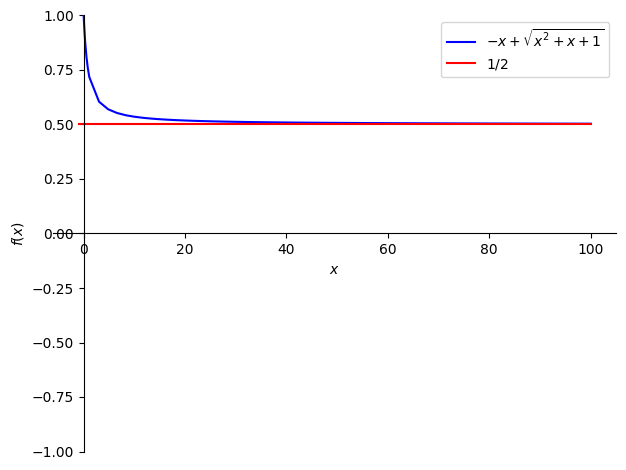

In [87]:
# Definir la variable simbólica x
x = sp.symbols('x')
y = sp.symbols('y')

# Definir la ecuación a)
a = sp.sqrt(x**2 + x + 1) -x

# Calcular el límite cuando x tiende a infinito (+)
límite = sp.limit(a, x, sp.oo)
eq_str = r"$\lim_{{x\to \infty}}\sqrt{x^2+x+1}-x$"

# Imprimir el resultado
dp(mk(f"El límite de la secuencia {eq_str}  es: {límite}"))
dp(mk(f"{eq_str}"))
p1 = sp.plot(a,límite, (x, -1, 100), ylim=[-1, 1], show=False)
p1[0].line_color = 'blue'
p1[0].label = a
p1[1].line_color = 'red'
p1[1].label = límite
p1.legend = True
p1.show()

## **Problema Lineal**
---
### Resuelva el siguiente problema lineal
$$\begin{equation} \; Min\;C = x+y+z \tag{2} \end{equation}$$
$$s.a.$$
$$\begin{align} g(C) = \mathbf{(y-1)^2 - z^2\; \leq 1\tag{3}} \\ h(C)=\; \mathbf{x^2+(y-1)^2+z^2 \leq 3\tag{4}} \end{align}$$

# Resultados de la optimización con GEKKO

A continuación se muestran los resultados de la optimización realizada con la biblioteca GEKKO.

## Variables de decisión óptimas

- Variable \(x\) óptima: Valor óptimo de \(x\).
- Variable \(y\) óptima: Valor óptimo de \(y\).
- Variable \(z\) óptima: Valor óptimo de \(z\).

## Resultados de la optimización

- Función Objetivo Óptima: Valor de la función objetivo en el punto óptimo.
- Función \(g\) Óptima: Valor de la restricción \(g\) en el punto óptimo.
- Función \(h\) Óptima: Valor de la restricción \(h\) en el punto óptimo.

## Resultados

- **Variable \(x\) óptima:** x_optimo
- **Variable \(y\) óptima:** y_optimo
- **Variable \(z\) óptima:** z_optimo

- **Función Objetivo Óptima:** objetivo_optimo
- **Función \(g\) Óptima:** g_optimo
- **Función \(h\) Óptima:** h_optimo

Los valores específicos de las variables y funciones en el punto óptimo se pueden encontrar en el código de Python proporcionado.

```python
# Extraer los valores óptimos
x_optimo = c[0].value[0]
y_optimo = c[1].value[0]
z_optimo = c[2].value[0]

# Evaluar la función objetivo y las restricciones
objetivo_optimo = x_optimo + y_optimo + z_optimo
g_optimo = (y_optimo-1)**2 - z_optimo**2
h_optimo = x_optimo**2 + (y_optimo-1)**2 + z_optimo**2

# Imprimir los resultados
print('Función Objetivo Óptima:', objetivo_optimo)
print('Función g Óptima:', g_optimo)
print('Función h Óptima:', h_optimo)


In [82]:
m=GEKKO(remote=False)
c=m.Array(m.Var,3, value=1)
x, y, z=c
#cambiar valores iniciales (no es necesario, pero pueden hacerlo)
y.value=5;z.value=3
m.Equation((y-1)**2-z**2<=1)
m.Equation(x**2+(y-1)**2+z**2<=3)
m.Minimize(x+y+z)
m.solve(disp=False)

# Imprimir solución
print('Objetivo: ', m.options.OBJFCNVAL)
print('Solución: ', c)
# Extraer los valores óptimos
x_optimo = c[0].value[0]
y_optimo = c[1].value[0]
z_optimo = c[2].value[0]

# Evaluar la función objetivo y las restricciones
objetivo_optimo = x_optimo + y_optimo + z_optimo
g_optimo = (y_optimo-1)**2-z_optimo**2
h_optimo = x_optimo**2 + (y_optimo-1)**2 + z_optimo**2

# Imprimir los resultados
print('Función Objetivo Óptima:', objetivo_optimo)
print('Función g Óptima:', g_optimo)
print('Función h Óptima:', h_optimo)

Objetivo:  -2.0000000068
Solución:  [[-1.0000000034] [3.2000913472e-09] [-1.0000000065]]
Función Objetivo Óptima: -2.000000006699909
Función g Óptima: -1.9400182793560816e-08
Función h Óptima: 3.0000000133998177


# Ecuaciones en Diferencias
---
### Resuelva las siguientes ecuaciones en diferencias
$\begin{equation}\mathbf{y_{t+1}+\dfrac{1}{4}y_t=5} \tag{5}\end{equation} $ $ \begin{equation}\mathbf{y_{t+1}-3y_t=4} \tag{6}\end{equation} $ $ \begin{equation}\mathbf{y_{t+2}-5y_{t+1}-6y_t=2(6)^t}\tag{7}\end{equation}$

## Resultados de las Ecuaciones en Diferencias
### Ecuación (5)

In [44]:
# Definir variables y la ecuación en diferencias
t , c = sp.symbols('t c')
y = sp.Function('y')
ecuacion_str=r"$\begin{equation}\mathbf{y_{t+1}+\dfrac{1}{4}\cdot y_t=5} \tag{5}\end{equation} $"
ecuacion = sp.Eq(y(t + 1) + (1/4)*y(t), 5)
# Esta es la solución general de la ecuación en diferencias
solucion_general = sp.rsolve(ecuacion, y(t))
solucion_general_str = r"$$y(t) = 4 - C_0 \cdot \left(-\frac{1}{4}\right)^t\tag{5.a}$$"
dp(mk(f"La solución general de la ecuación en diferencias {ecuacion_str} es: {solucion_general_str}"))
# Resolver la ecuación en diferencias (acá asignamos que y(0) = 0)
solucion_particular = sp.rsolve(ecuacion, y(t), {y(0): 0})
solucion_particular_str = r"$\begin{equation}\mathbf{y(t)=4-4\cdot(-\dfrac{1}{4})^t}\end{equation}\tag{5.b}$"
# Mostrar la solución
dp(mk(f"La solución particular cuando y(0) = 0 es: {solucion_particular_str}"))

La solución general de la ecuación en diferencias $\begin{equation}\mathbf{y_{t+1}+\dfrac{1}{4}\cdot y_t=5} \tag{5}\end{equation} $ es: $$y(t) = 4 - C_0 \cdot \left(-\frac{1}{4}\right)^t\tag{5.a}$$

La solución particular cuando y(0) = 0 es: $\begin{equation}\mathbf{y(t)=4-4\cdot(-\dfrac{1}{4})^t}\end{equation}\tag{5.b}$

### Ecuación (6)

In [57]:
t, c = sp.symbols('t c')
y = sp.Function('y')

# Definir variables y la ecuación en diferencias
ecuacion_str = r"$\begin{equation}\mathbf{y_{t+1}-3\cdot y_t=4} \tag{6}\end{equation}$"
ecuacion = sp.Eq(y(t + 1) - 3*y(t), 4)

# Esta es la solución general de la ecuación en diferencias
solucion_general = sp.rsolve(ecuacion, y(t))
solucion_general_str = r"$$y(t) = C_0\cdot 3^t - 2\tag{6.a}$$"

dp(mk(f"La solución general de la ecuación en diferencias {ecuacion_str} es: {solucion_general_str}"))

# Resolver la ecuación en diferencias (acá asignamos que y(0) = 0)
solucion_particular = sp.rsolve(ecuacion, y(t), {y(0): 0})
solucion_particular_str = r"$\begin{equation}\mathbf{y(t)=2\cdot 3^t-2}\end{equation}\tag{6.b}$"

dp(mk(f"La solución particular cuando y(0) = 0 es: {solucion_particular_str}"))

La solución general de la ecuación en diferencias $\begin{equation}\mathbf{y_{t+1}-3\cdot y_t=4} \tag{6}\end{equation}$ es: $$y(t) = C_0\cdot 3^t - 2\tag{6.a}$$

La solución particular cuando y(0) = 0 es: $\begin{equation}\mathbf{y(t)=2\cdot 3^t-2}\end{equation}\tag{6.b}$

### Ecuación (7)

In [75]:
t = sp.symbols('t')
y = sp.Function('y')

# Definir variables y la ecuación en diferencias
ecuacion_str = r"$ \begin{equation}\mathbf{y_{t+2}-5\cdot y_{t+1}-6\cdot y_t=2\cdot (6)^t}\tag{7}\end{equation}$"
ecuacion = sp.Eq(y(t + 2) - 5*y(t + 1) - 6*y(t), 2 * sp.Pow(6, t))

# Esta es la solución general de la ecuación en diferencias
solucion_general = sp.rsolve(ecuacion, y(t))
print(solucion_general)
solucion_general_str = r"$$y(t)=(-1)^t \cdot C_0 + 6^t \cdot C_1 + \frac{6^t \cdot t}{21}\tag{7.a}$$"

# Resolver la ecuación en diferencias (acá asignamos que y(0) = 0)
solucion_particular = sp.rsolve(ecuacion, y(t), {y(0): 0})
solucion_particular_str = r"$\begin{equation} y(t)= - (-1)^t \cdot C_1 + 6^t \cdot C_1 + \frac{6^t \cdot t}{21} \end{equation}\tag{7.b}$"

# Mostrar la solución
dp(mk(f"La solución general de la ecuación en diferencias {ecuacion_str} es: {solucion_general_str}"))
dp(mk(f"La solución particular cuando y(0) = 0 es: {solucion_particular_str}"))

(-1)**t*C0 + 6**t*C1 + 6**t*t/21


La solución general de la ecuación en diferencias $ \begin{equation}\mathbf{y_{t+2}-5\cdot y_{t+1}-6\cdot y_t=2\cdot (6)^t}\tag{7}\end{equation}$ es: $$y(t)=(-1)^t \cdot C_0 + 6^t \cdot C_1 + \frac{6^t \cdot t}{21}\tag{7.a}$$

La solución particular cuando y(0) = 0 es: $\begin{equation} y(t)= - (-1)^t \cdot C_1 + 6^t \cdot C_1 + \frac{6^t \cdot t}{21} \end{equation}\tag{7.b}$